In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, callbacks

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

N,n,m = x_train.shape
x_train = np.reshape(x_train,(N,n,m,1))

N,n,m = x_test.shape
x_test = np.reshape(x_test,(N,n,m,1))

In [3]:
def displayConvLayer(layer_name):
    weights = layer_name.get_weights()[0]
    fig, ax = plt.subplots(weights.shape[-2],weights.shape[-1],figsize=(15,15))
    for i in range(weights.shape[-1]):
        for j in range(weights.shape[-2]):
            weight = np.reshape(weights[:,:,j,i],weights.shape[0:2])
            if weights.shape[-2]==1:
                ax[i].imshow(weight)
            else:
                ax[j,i].imshow(weight)
                
    return weights

In [4]:
model = models.Sequential()
conv1 = layers.Conv2D(6, (5, 5), padding='same', activation='relu', input_shape=(28, 28 ,1))
model.add(conv1)
model.add(layers.MaxPooling2D((2, 2)))
conv2 = layers.Conv2D(16, (5, 5), activation='relu')
model.add(conv2)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten(input_shape=(5, 5, 16)))
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 80)                9

In [5]:
#print_weights = callbacks.LambdaCallback(on_epoch_end=lambda batch, logs: print(conv1.get_weights()[0]))

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

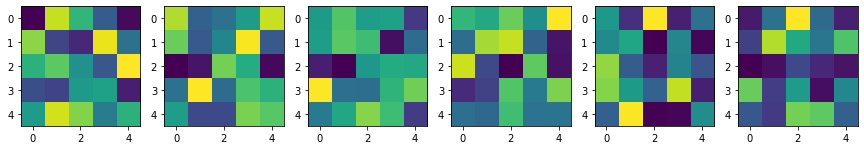

In [7]:
weights_i  = displayConvLayer(conv1)

In [8]:
history = model.fit(x_train, tf.one_hot(y_train,10), batch_size  = 128, epochs=20,
          validation_data=(x_test, tf.one_hot(y_test,10)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 32s 531us/sample - loss: 0.3287 - accuracy: 0.9007 - val_loss: 0.0778 - val_accuracy: 0.9743
Epoch 2/20
60000/60000 [==============================] - 35s 580us/sample - loss: 0.0803 - accuracy: 0.9757 - val_loss: 0.0632 - val_accuracy: 0.9797
Epoch 3/20
60000/60000 [==============================] - 33s 549us/sample - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0432 - val_accuracy: 0.9848
Epoch 4/20
60000/60000 [==============================] - 36s 599us/sample - loss: 0.0447 - accuracy: 0.9860 - val_loss: 0.0429 - val_accuracy: 0.9854
Epoch 5/20
60000/60000 [==============================] - 41s 679us/sample - loss: 0.0362 - accuracy: 0.9889 - val_loss: 0.0389 - val_accuracy: 0.9877
Epoch 6/20
60000/60000 [==============================] - 37s 622us/sample - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0392 - val_accuracy: 0.9878
Epoch 7/20
60000/60000 [====================

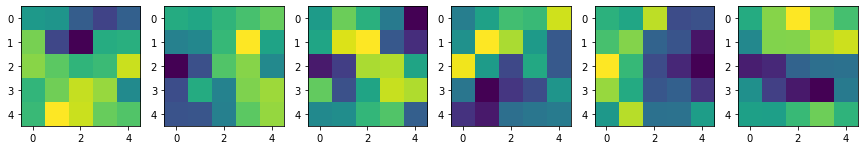

In [9]:
weights_f = displayConvLayer(conv1)

10000/1 - 2s - loss: 0.0227 - accuracy: 0.9891


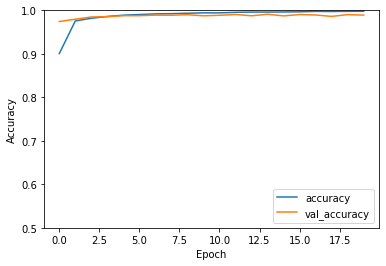

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  tf.one_hot(y_test,10), verbose=2)

Text(0, 0.5, 'Loss')

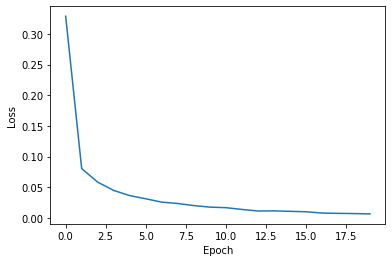

In [11]:
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')